## Introduction:
  
  As for one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters(HPF1)etc.
  A LPF helps in removing noise, or blurring the image. A HPF filters helps in finding edges in an image.
OpenCV provides a function, cv2.filter2D(), to convolve a kernel with an image.



As an example, we will try an
averaging filter on an image. A 5x5 averaging filter kernel can be defined as follows:



                            [  1 1 1 1 1
                 K  =  1/25    1 1 1 1 1
                               1 1 1 1 1
                               1 1 1 1 1
                               1 1 1 1 1 ]


Filtering with the above kernel results in the following being performed: for each pixel, a 5x5 window is centered on
this pixel, all pixels falling within this window are summed up, and the result is then divided by 25. This equates to
computing the average of the pixel values inside that window. This operation is performed for all the pixels in the
image to produce the output filtered image. Try this code and check the result:





In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Reading the image
img = cv2.imread('opencv_logo.jpg')

#Creating the Averaging Kernel
kernel = np.ones((5,5),np.float32)/25

#Convolving it with the given image
dst = cv2.filter2D(img,-1,kernel)

#Plotting them
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

![Blurring](opencv_logo.jpg)

# Image Blurring (Image Smoothing):

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It
actually removes high frequency content (e.g: noise, edges) from the image resulting in edges being blurred when this
is filter is applied. (Well, there are blurring techniques which do not blur edges). OpenCV provides mainly four types
of blurring techniques.


### 1. Averaging
This is done by convolving the image with a normalized box filter. It simply takes the average of all the pixels
under kernel area and replaces the central element with this average. This is done by the function cv2.blur() or
cv2.boxFilter(). We should specify the width and height of kernel.
A 3x3 normalized box filter would look like this:



                       [ 1 1 1
               k = 1/9   1 1 1
                         1 1 1 ]


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#Reading the image
img = cv2.imread('opencv_logo.jpg')
#creating the averaged image using cv2.blur()
blur = cv2.blur(img,(5,5))
#Plotting the images
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

![Blurring](opencv_logo.jpg)

### 2. Gaussian Filtering
In this approach, instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used. It is done 
with the function, cv2.GaussianBlur(). 
     We should specify the width and height of the kernel which should be positive and
odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If
only sigmaX is specified, sigmaY is taken as equal to sigmaX.                                                                                         

If both are given as zeros, they are calculated from the
kernel size. Gaussian filtering is highly effective in removing Gaussian noise from the image.
If you want, you can create a Gaussian kernel with the function, cv2.getGaussianKernel()

In [ ]:
blur = cv2.GaussianBlur(img,(5,5),0)

Instead of cv2.blur() use cv2.GaussianBlur()

![Gaussian](Gaussian_Blur.jpg)

### 3. Median Filtering:
Here, the function cv2.medianBlur() computes the median of all the pixels under the kernel window and the central
pixel is replaced with this median value. This is highly effective in removing salt-and-pepper noise. One interesting
thing to note is that, in the Gaussian and box filters, the filtered value for the central element can be a value which
may not exist in the original image. 

However this is not the case in median filtering, since the central element is always
replaced by some pixel value in the image. This reduces the noise effectively. The kernel size must be a positive odd
integer.

Here a 50% noise is added to our original image and median filter is then used

![Median Blur image](median_blur.jpg)

### Bilateral Filtering:
 One of the biggest problems with the previous filters is that they blur the edges also.But bilateral Filtering is very effective in removing the noise as well as preseving the edges.
 The bilateral filtering is done by using the Gaussain kernel in space domain bout also uses one more multiplicative component which is Gaussian with difference in intensities as the input.The Gaussian function of space makes sure that
only pixels are ‘spatial neighbors’ are considered for filtering, while the Gaussian component applied in the intensity
domain (a Gaussian function of intensity differences) ensures that only those pixels with intensities similar to that of
the central pixel (‘intensity neighbors’) are included to compute the blurred intensity value. As a result, this method
preserves edges, since for pixels lying near edges, neighboring pixels placed on the other side of the edge, and
therefore exhibiting large intensity variations when compared to the central pixel, will not be included for blurring

![Bilateral explanation](bilateral_filter.jpeg)

In [ ]:
#The cv2 function used is cv2.bilateralFilter()
#arguments used are
"""
Input array src = source image
int d = filter size
double sigmacolour = Gaussian sigma for intensity differences 
double sigmaspace =  Gaussian sigma for the coordinates in the image
int borderType = BORDER_DEFAULT
"""
blur = cv2.bilateralFilter(img,9,75,75)
#Here the kernal size is 9X9 with sigmacolour and sigmaspace equal to 75

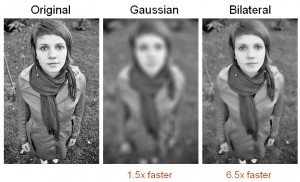

In [2]:
from IPython.display import Image
Image(filename='bilateral1.jpg')

# Further Readings:
[MIT BF Course](http://people.csail.mit.edu/sparis/bf_course/)

[IITD BF Course](www.cse.iitd.ernet.in/~pkalra/col783/bilateral-filtering.pdf)

[Machine Vision Bilateral Filtering](http://www.cse.usf.edu/~r1k/MachineVisionBook/MachineVision.files/MachineVision_Chapter4.pdf)